In [1]:
import math
import random
from contextlib import redirect_stdout
import time
import dimod
import dwave_networkx as dnx
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import minorminer
import networkx as nx
import numpy as np
from dwave.samplers import SimulatedAnnealingSampler
from dwave.system import EmbeddingComposite

In [2]:
# DWave Topologies
topology_chimera = dnx.chimera_graph(16)
topology_pegasus = dnx.pegasus_graph(16)
topology_zephyr = dnx.zephyr_graph(15)

# Non-Dwave Topology Example [Mesh] 
mrow = 50
ncol = 50
topology_mesh = nx.grid_2d_graph(mrow, ncol)

# vertex array [1-60]
ns = np.arange(1, 61)

n = 60

In [3]:
############### complete graphs ###############

In [ ]:
# Complete Graph, variable n vertices (MM, busclique) (Chimera, Pegasus, Zephyr)

m = 3 # number of runs per vertex

# initalize qubit, time, and maxchain arrays for each alg. and top.
qubits_chimera = np.zeros_like(ns)
qubits_chimera_clique = np.zeros_like(ns)
qubits_pegasus = np.zeros_like(ns)
qubits_pegasus_clique = np.zeros_like(ns)
qubits_zephyr = np.zeros_like(ns)
qubits_zephyr_clique = np.zeros_like(ns)

times_chimera = np.zeros_like(ns)
clique_time_chim = np.zeros_like(ns)
times_pegasus = np.zeros_like(ns)
clique_time_pega = np.zeros_like(ns)
clique_time_zeph = np.zeros_like(ns)
times_zephyr = np.zeros_like(ns)

maxchain_chimera = np.zeros_like(ns)
maxchain_chimera_clique = np.zeros_like(ns)
maxchain_pegasus = np.zeros_like(ns)
maxchain_pegasus_clique = np.zeros_like(ns)
maxchain_zephyr = np.zeros_like(ns)
maxchain_zephyr_clique = np.zeros_like(ns)

for i, n in enumerate(ns):
    G = nx.complete_graph(n) # input graph
       
    for j in range(m):
        # run embedding m times
        # time embedding function, record time, qubits, & maxchain size
        
        # Minorminer, Chimera
        start_time = float(time.process_time())
        embedding = minorminer.find_embedding(G, topology_chimera)
        times_chimera[i] += float(time.process_time() - start_time)
        qubits_chimera[i] += sum(map(len, embedding.values()))
        maxchain_chimera[i] += max(map(len, embedding.values()))

        # draw fcns initialized below
        if i%10 == 0 and i > 0 and j == 0: # draw chimera embeddig every 10 vertices, on the first run only
            draw_chim(topology_chimera, embedding, i)
            
        # Minorminer, Pegasus
        start_time = float(time.process_time())   
        embedding = minorminer.find_embedding(G, topology_pegasus)
        times_pegasus[i] += float(time.process_time() - start_time)
        qubits_pegasus[i] += sum(map(len, embedding.values()))
        maxchain_pegasus[i] += max(map(len, embedding.values()))
    
        if i%10 == 0 and i > 0 and j == 0: # draw pegasus embedding
            draw_pega(topology_pegasus, embedding, i)

        # Minorminer, Zephyr
        start_time = float(time.process_time())    
        embedding = minorminer.find_embedding(G, topology_zephyr)
        times_zephyr[i] += float(time.process_time() - start_time)
        qubits_zephyr[i] += sum(map(len, embedding.values()))
        maxchain_zephyr[i] += max(map(len, embedding.values()))
    
        if i%10 == 0 and i > 0 and j == 0: # draw zephyr embedding
             draw_zeph(topology_zephyr, embedding, i)
            
    # find the averages      
    for tensor in [qubits_chimera, qubits_chimera_clique, qubits_pegasus, qubits_pegasus_clique, qubits_zephyr, qubits_zephyr_clique, maxchain_chimera, maxchain_chimera_clique, maxchain_pegasus, maxchain_pegasus_clique, maxchain_zephyr, maxchain_zephyr_clique, times_chimera, times_pegasus, times_zephyr]:
        tensor[i] /= m

    # run busclique 1x per vertex
    # Busclique, Chimera
    start_clique_time = float(time.process_time())    
    embedding = minorminer.busclique.find_clique_embedding(n, topology_chimera)
    clique_time_chim[i] = float(time.process_time() - start_clique_time) #### 
    qubits_chimera_clique[i] = sum(map(len, embedding.values()))
    maxchain_chimera_clique[i] = max(map(len, embedding.values()))

    # Busclique, Pegasus
    start_clique_time = time.process_time()
    embedding = minorminer.busclique.find_clique_embedding(n, topology_pegasus)
    clique_time_pega[i] = float(time.process_time() - start_clique_time) 
    qubits_pegasus_clique[i] = sum(map(len, embedding.values()))
    maxchain_pegasus_clique[i] = max(map(len, embedding.values()))

    # Busclique, Zephyr
    start_clique_time = time.process_time()
    embedding = minorminer.busclique.find_clique_embedding(n, topology_zephyr)
    clique_time_zeph[i] = float(time.process_time() - start_clique_time)
    qubits_zephyr_clique[i] = sum(map(len, embedding.values()))
    maxchain_zephyr_clique[i] = max(map(len, embedding.values()))
        
    print(str(i) + " done")



In [ ]:
# mesh
# complete (mesh)

m = 3

qubits_mesh   = np.zeros_like(ns)
maxchain_mesh = np.zeros_like(ns)
times_mesh   = [0.0]*n

clique_time_mesh = np.zeros_like(ns)
qubits_mesh_clique = np.zeros_like(ns)
maxchain_mesh_clique = np.zeros_like(ns)

for i, n in enumerate(ns):
    G = nx.complete_graph(n)
    
    for j in range(m):
        start_time = float(time.process_time())
        embedding = minorminer.find_embedding(G, topology_mesh)
        times_mesh[i]  += float(time.process_time() - start_time)
        qubits_mesh[i] += sum(map(len, embedding.values()))
        if embedding.values():
            maxchain_mesh[i] += max(map(len, embedding.values()))

        if embedding.values() and i > 0: # if an embedding is found, draw mesh embed 
            draw_mesh(topology_mesh, embedding, i, j)
            
    # Find averages    
    for tensor in [qubits_mesh, maxchain_mesh, times_mesh]:
        tensor[i] /= m
        
    print(str(i) + " done")

In [15]:
def draw_chim(topology_chimera, embed, k):
    # draw a given chimera embedding
    # topology, source graph, degree k
    
    plt.ion ()
    dnx.draw_chimera_embedding(
        topology_chimera, 
        embed, 
        show_labels=True,
        node_shape='.',
        width=0.25,
        node_size=3,
    )
    #plt.savefig(f'comp_chim_embed{k}')
    plt.clf()
    
def draw_pega(topology_pegasus, embed, k):
    # draw a given pegasus embedding
    # topology, source graph, degree k
    
    plt.ion ()
    dnx.draw_pegasus_embedding(
        topology_pegasus, 
        embed, 
        show_labels=False,
        node_shape='.',
        width=0.25,
        node_size=3,
    )
    #plt.savefig(f'comp_pega_embed{k}')
    plt.clf()
    
def draw_zeph(topology_zephyr, embed, k):
    # draw a given zephyr embedding
    # topology, source graph, degree k
    
    plt.ion ()
    dnx.draw_zephyr_embedding(
        topology_zephyr, 
        embed, 
        show_labels=False,
        node_shape='.',
        width=0.25,
        node_size=1,
    )
    plt.savefig(f'comp_zeph_embed{k}')
    plt.clf()



In [32]:
# I did not figure out how to color each chain differently for mesh, 
#      only coloring the topology different from the entire embedding
# If you mess with the 'colors' parameter with draw_networkx
#      and pass more information to the section regarding the 
#      logic graph mapping to the embedding, you could possibly 
#      achieve the desired effect

def draw_mesh(mesh, embed, k1, k2):
    # draw a given non-dwave embedding [ex. mesh]
    # topology, source graph, degree k, run j
    
    colors = set() # initialize a set of nodes to mark which nodes are in the embbedding
    
    for i in mesh.nodes(): # if i is an embedded node, put in 'colors'
        for val_list in embed.values():
            for p in val_list:
                if i == p:
                    colors.add(i)
    
    nx.draw_networkx(
        mesh,
        node_color=['red' if i in colors else 'blue' for i in mesh.nodes()], # mark embedded nodes as red
        node_size = 20,
        node_shape = '.',
        with_labels=False,
        edge_color=['gray'],
    )
    #plt.savefig(f'comp_50x50mesh_embed_{k1}-{k2}')
    plt.clf()


In [39]:
from contextlib import redirect_stdout

with open('complete_output.txt', 'w') as f:
    with redirect_stdout(f):
        print('Complete')
        print(f'Chimera Times: {times_chimera}')
        print(f'Pegasus Times: {times_pegasus}')
        print(f'Zephyr  Times: {times_zephyr}')
        print(f'Mesh Times: {times_mesh}')
        print()
        print(f'Chimera Qubits: {qubits_chimera}')
        print(f'Pegasus Qubits: {qubits_pegasus}')
        print(f'Zephyr  Qubits: {qubits_zephyr}')
        print(f'Mesh Qubits: {qubits_mesh}')
        print()
        print(f'Chimera Maxchain: {maxchain_chimera}')
        print(f'Pegasus Maxchain: {maxchain_pegasus}')
        print(f'Zephyr  Maxchain: {maxchain_zephyr}')
        print(f'Mesh Maxchain: {maxchain_mesh}')
        print()
        print('Clique')
        print(f'Time Chimera: {clique_time_chim}')
        print(f'Time Pegasus: {clique_time_pega}')
        print(f'Time Zephyr: {clique_time_zeph}')
        print(f'Time Mesh: {clique_time_mesh}')
        print()
        print(f'Qubit Chimera: {qubits_chimera_clique}')
        print(f'Qubit Pegasus: {qubits_pegasus_clique}')
        print(f'Qubit Zephyr: {qubits_zephyr_clique}')
        print(f'Qubit Mesh: {qubits_mesh_clique}')
        print()
        print(f'Maxchain Chimera: {maxchain_chimera_clique}')
        print(f'Maxchain Pegasus: {maxchain_pegasus_clique}')
        print(f'Maxchain Zephyr: {maxchain_zephyr_clique}')
        print(f'Maxchain Mesh: {maxchain_mesh_clique}')

In [ ]:
## Data & Plots ##

Text(0, 0.5, 'Time taken to embed (s)')

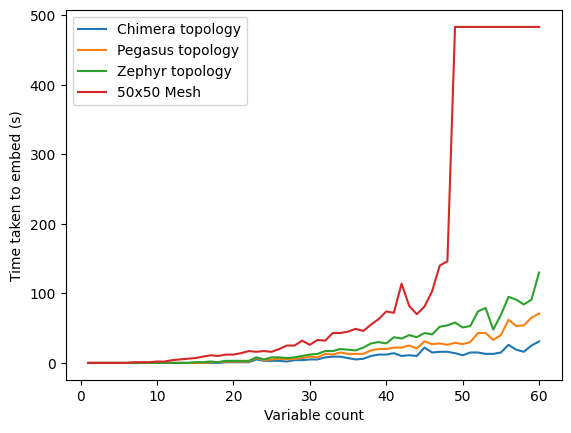

In [45]:
# Time Plot
plt.plot(ns, times_chimera)
plt.plot(ns, clique_time_chim)
plt.plot(ns, times_pegasus)
plt.plot(ns, clique_time_pega)
plt.plot(ns, times_zephyr)
plt.plot(ns, clique_time_zeph)
plt.plot(ns, times_mesh)
plt.plot(ns, clique_time_mesh)
plt.legend(["Chimera MM topology","Chimera BC topology","Pegasus MM topology","Pegasus BC topology", "Zephyr MM topology","Zephyr BC topology", "50x50 MM Mesh","50x50 BC Mesh"])
plt.xlabel("Variable count")
plt.ylabel("Time taken to embed (s)")

In [10]:
## broken chimera ##

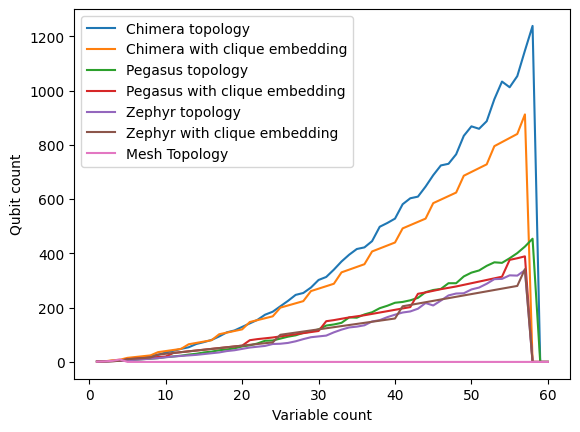

In [48]:
# Qubit Plot
plt.plot(ns, qubits_chimera)
plt.plot(ns, qubits_chimera_clique)
plt.plot(ns, qubits_pegasus)
plt.plot(ns, qubits_pegasus_clique)
plt.plot(ns, qubits_zephyr)
plt.plot(ns, qubits_zephyr_clique)
plt.plot(ns, qubits_mesh)
plt.legend(["Chimera topology", "Chimera with clique embedding", "Pegasus topology", "Pegasus with clique embedding", "Zephyr topology", "Zephyr with clique embedding", "Mesh Topology"])
plt.xlabel("Variable count")
plt.ylabel("Qubit count")
plt.savefig("qubits-complete.png")

nqubits = 0.06192557195933508*avg_degree^2 + 13.255021355270776*avg_degree + -103.90692577440105
nqubits = 0.008226778480365276*avg_degree^2 + 5.86496284501225*avg_degree + -41.38500876680306
nqubits = -0.028347773652364794*avg_degree^2 + 6.34102302858197*avg_degree + -44.34538281706606
[0.7011050385308008, 0.7025975385771844, 0.6024814392277764]


Text(0, 0.5, 'Qubit count')

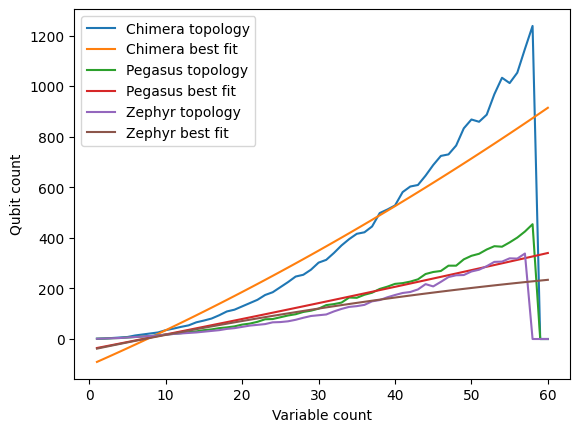

In [47]:
plt.plot(ns, qubits_chimera)
a, b, c = np.polyfit(ns, qubits_chimera, 2)
chimera_fit = a*ns*ns + b*ns + c
plt.plot(ns, chimera_fit)
print("nqubits = " + str(a) + "*avg_degree^2 + " + str(b) + "*avg_degree + " + str(c))

plt.plot(ns, qubits_pegasus)
a, b, c = np.polyfit(ns, qubits_pegasus, 2)
pegasus_fit = a*ns*ns + b*ns + c
plt.plot(ns, pegasus_fit)
print("nqubits = " + str(a) + "*avg_degree^2 + " + str(b) + "*avg_degree + " + str(c))

plt.plot(ns, qubits_zephyr)
a, b, c = np.polyfit(ns, qubits_zephyr, 2)
zephyr_fit = a*ns*ns + b*ns + c
plt.plot(ns, zephyr_fit)
print("nqubits = " + str(a) + "*avg_degree^2 + " + str(b) + "*avg_degree + " + str(c))

# test correlation
corr_matrices = [np.corrcoef(qubits_chimera, chimera_fit), np.corrcoef(qubits_pegasus, pegasus_fit), np.corrcoef(qubits_zephyr, zephyr_fit)]
corrs = [matrix[0,1] for matrix in corr_matrices]
R_sq = [corr**2 for corr in corrs]
print(R_sq)

plt.legend(["Chimera topology", "Chimera best fit", "Pegasus topology", "Pegasus best fit", "Zephyr topology", "Zephyr best fit"])
plt.xlabel("Variable count")
plt.ylabel("Qubit count")
#plt.savefig("qubits-complete-fit.png")

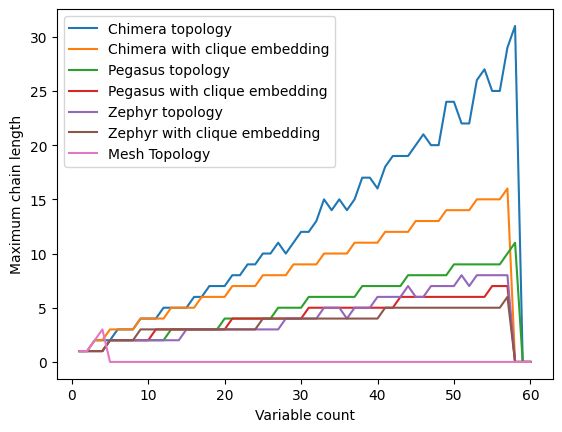

In [49]:
# Maxchain Plot
plt.plot(ns, maxchain_chimera)
plt.plot(ns, maxchain_chimera_clique)
plt.plot(ns, maxchain_pegasus)
plt.plot(ns, maxchain_pegasus_clique)
plt.plot(ns, maxchain_zephyr)
plt.plot(ns, maxchain_zephyr_clique)
plt.plot(ns, maxchain_mesh)
plt.legend(["Chimera topology", "Chimera with clique embedding", "Pegasus topology", "Pegasus with clique embedding", "Zephyr topology", "Zephyr with clique embedding", "Mesh Topology"])
plt.xlabel("Variable count")
plt.ylabel("Maximum chain length")
plt.savefig("qubits-complete-maxchain.png")

In [ ]:
plt.loglog(ns, qubits_pegasus)

In [ ]:
i = 50
A = np.vstack([np.log(ns[i:]), np.ones(len(ns) - i)]).T
m, c = np.linalg.lstsq(A, np.log(qubits_pegasus[i:]), rcond=None)[0]
m

In [ ]:
# ?? fit curve
plt.plot(ns, qubits_pegasus)
plt.plot(ns, ns**m * np.exp(c))
plt.title("Ulrik's fit")

# test correlation
corr_matrices = [np.corrcoef(qubits_pegasus, pegasus_fit)]
corrs = [matrix[0,1] for matrix in corr_matrices]
R_sq = [corr**2 for corr in corrs]
print(R_sq)

In [ ]:
# degree 2 polynomial fit curve
plt.plot(ns, qubits_pegasus)
a, b, c = np.polyfit(ns, qubits_pegasus, 2)
plt.plot(ns, a*ns*ns + b*ns + c)
plt.title("Degree 2 polynomial fit")

# test correlation
corr_matrices = [np.corrcoef(qubits_pegasus, pegasus_fit)]
corrs = [matrix[0,1] for matrix in corr_matrices]
R_sq = [corr**2 for corr in corrs]
print(R_sq)